In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import gzip
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
realtor_df = pd.read_csv("F:/data science/DSC530/data sets/realtor-data.csv")

In [3]:
realtorbase = pd.read_csv("F:/data science/DSC530/data sets/realtor-data.csv")

In [4]:
realtor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512159 entries, 0 to 512158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        512159 non-null  object 
 1   price         512159 non-null  float64
 2   bed           413222 non-null  float64
 3   bath          416941 non-null  float64
 4   acre_lot      407180 non-null  float64
 5   full_address  512159 non-null  object 
 6   street        511543 non-null  object 
 7   city          512100 non-null  object 
 8   state         512159 non-null  object 
 9   zip_code      511962 non-null  float64
 10  house_size    395693 non-null  float64
 11  sold_date     202507 non-null  object 
dtypes: float64(6), object(6)
memory usage: 46.9+ MB


In [5]:
realtor_df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [6]:
realtor_df = realtor_df[~realtor_df['state'].isin(['Puerto Rico', 'Virgin Islands'])]

In [7]:
realtor_df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
24231,for_sale,180000.0,2.0,1.0,0.34,"23 Moore St, Agawam, MA, 01001",23 Moore St,Agawam,Massachusetts,1001.0,676.0,NaN
24232,for_sale,25000.0,NaN,NaN,3.41,"Leonard St, Agawam, MA, 01001",Leonard St,Agawam,Massachusetts,1001.0,NaN,NaN
24233,for_sale,169900.0,2.0,2.0,NaN,"420 Main St Apt 42, Agawam, MA, 01001",420 Main St Apt 42,Agawam,Massachusetts,1001.0,892.0,2019-04-30
24234,for_sale,242000.0,2.0,2.0,NaN,"2A Mansion Woods Dr Unit 2A, Agawam, MA, 01001",2A Mansion Woods Dr Unit 2A,Agawam,Massachusetts,1001.0,1428.0,NaN
24235,for_sale,299950.0,2.0,2.0,NaN,"19 Castle Hill Rd Unit C, Agawam, MA, 01001",19 Castle Hill Rd Unit C,Agawam,Massachusetts,1001.0,1659.0,NaN


In [8]:
realtor_df = realtor_df[realtor_df['bed'] <= 10]

In [77]:
realtor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387133 entries, 24231 to 512158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        387133 non-null  object 
 1   price         387133 non-null  float64
 2   bed           387133 non-null  float64
 3   bath          385282 non-null  float64
 4   acre_lot      292248 non-null  float64
 5   full_address  387133 non-null  object 
 6   street        386659 non-null  object 
 7   city          387126 non-null  object 
 8   state         387133 non-null  object 
 9   zip_code      387130 non-null  float64
 10  house_size    362270 non-null  float64
 11  sold_date     190449 non-null  object 
dtypes: float64(6), object(6)
memory usage: 38.4+ MB


In [85]:
realtor_df = realtor_df[realtor_df['house_size'].notnull()]

In [86]:
realtor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362270 entries, 24231 to 512158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        362270 non-null  object 
 1   price         362270 non-null  float64
 2   bed           362270 non-null  float64
 3   bath          360504 non-null  float64
 4   acre_lot      275887 non-null  float64
 5   full_address  362270 non-null  object 
 6   street        361850 non-null  object 
 7   city          362263 non-null  object 
 8   state         362270 non-null  object 
 9   zip_code      362267 non-null  float64
 10  house_size    362270 non-null  float64
 11  sold_date     174968 non-null  object 
dtypes: float64(6), object(6)
memory usage: 35.9+ MB


# Variables

### house price

In [10]:
price = realtor_df["price"]

In [11]:
price.mean(), price.median()

(800426.8072962005, 475000.0)

<Axes: xlabel='price', ylabel='Count'>

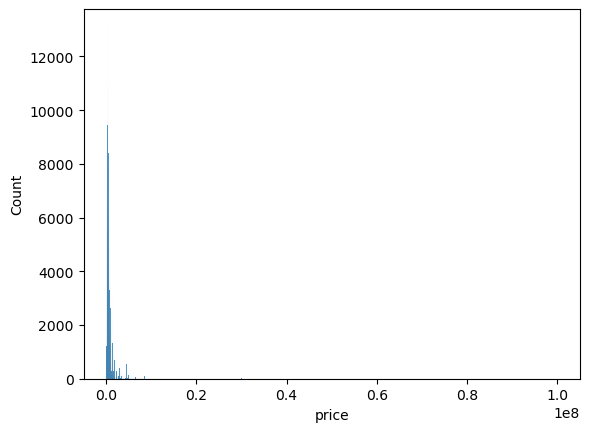

In [12]:
sns.histplot(price)

this is the straight histogram of values, there are many outliers in the data that cause it to be skewed harshly to the low end. but when taking the log of the values we can check for normalcy

In [13]:
log_price = np.log(realtor_df['price'].dropna().loc[realtor_df['price'] > 0])


<Axes: xlabel='price', ylabel='Count'>

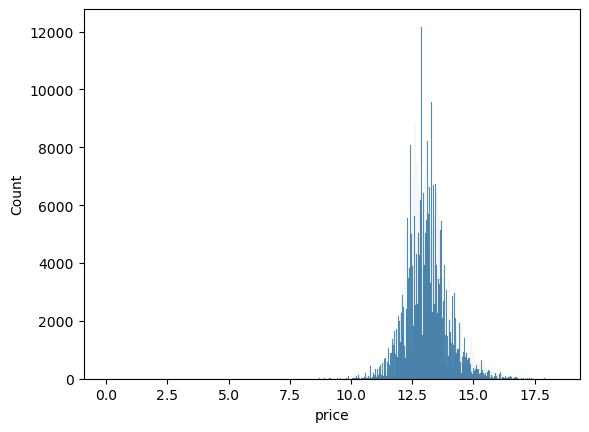

In [14]:
sns.histplot(log_price)

### bedrooms

In [15]:
bed = realtor_df.loc[realtor_df['bed'] <= 10, 'bed']

<Axes: xlabel='bed', ylabel='Count'>

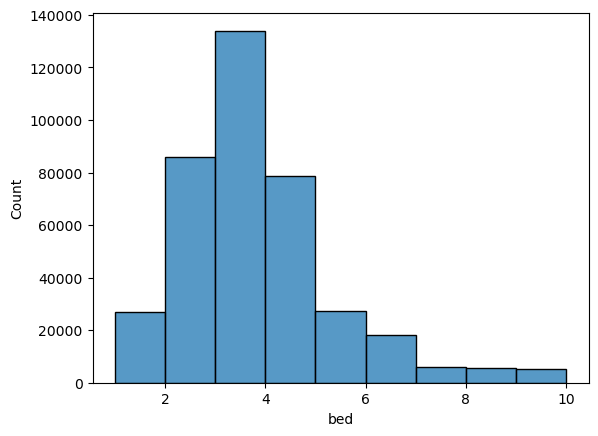

In [16]:
sns.histplot(bed, binwidth= 1)

for the bedroom count, I removed everything above 10 rooms as it made the data too messy to read properly, and this more accurately represents the counts of rooms as the median and mean both line up with this display. the plot below is a representation of what it looks like without accounting for the rooms

### bathrooms

In [17]:
bath = realtor_df.loc[realtor_df['bath'] <= 20, 'bath']

<Axes: xlabel='bath', ylabel='Count'>

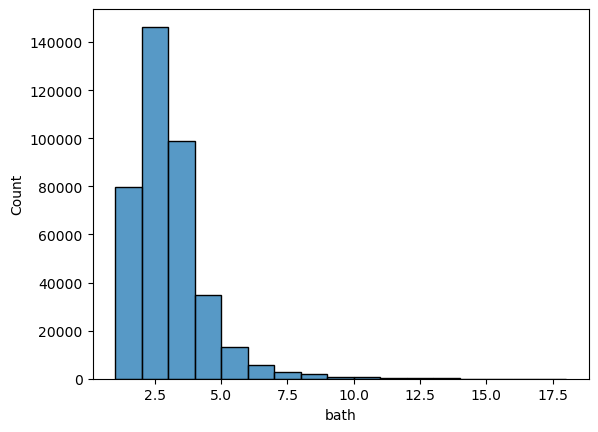

In [18]:
sns.histplot(bath, binwidth= 1)

### lot size

In [19]:
lot = realtor_df.loc[realtor_df['acre_lot'] <= 50, 'acre_lot']

In [31]:
lot2 = realtor_df.loc[realtor_df['acre_lot'] <= 2, 'acre_lot']

<Axes: xlabel='acre_lot', ylabel='Count'>

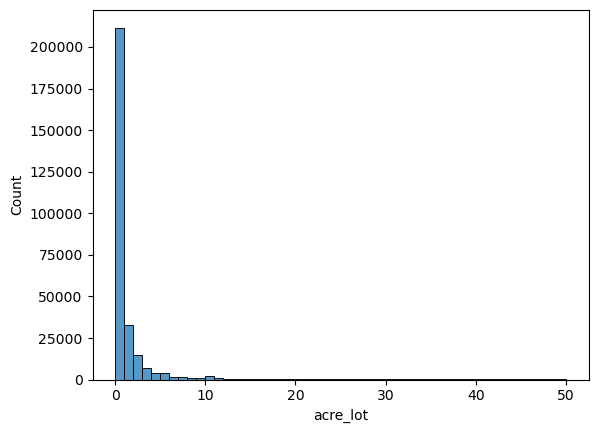

In [22]:
sns.histplot(lot, bins=50)

<Axes: xlabel='acre_lot', ylabel='Count'>

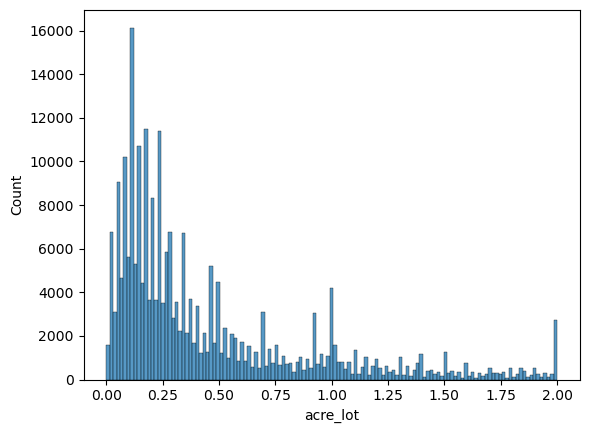

In [32]:
sns.histplot(lot2)

### house square footage

In [25]:
size = realtor_df.loc[realtor_df['house_size'] <= 10000, 'house_size']

<Axes: xlabel='house_size', ylabel='Count'>

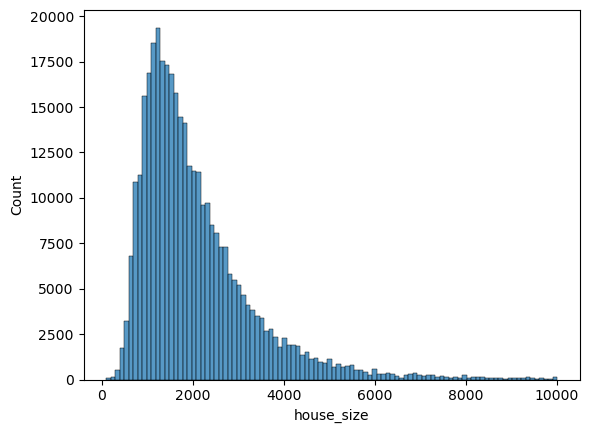

In [26]:
sns.histplot(size, bins = 100)

### create PMF of price

get the value counts and then frequency of the price

In [27]:
price_count = price.value_counts()
price_count

299900.0     3784
399900.0     3571
399000.0     3073
425000.0     3018
249900.0     3005
             ... 
878888.0        1
1100777.0       1
6050000.0       1
622500.0        1
733000.0        1
Name: price, Length: 4438, dtype: int64

In [28]:
price_pmfnorm = price.value_counts(normalize= True)
price_pmfnorm

299900.0     0.009774
399900.0     0.009224
399000.0     0.007938
425000.0     0.007796
249900.0     0.007762
               ...   
878888.0     0.000003
1100777.0    0.000003
6050000.0    0.000003
622500.0     0.000003
733000.0     0.000003
Name: price, Length: 4438, dtype: float64

In [29]:
def pmfmean(pmf):
    return sum(p * x for x, p in pmf.items())

### Compare house vs non house / PMF

In [33]:
house = realtor_df.dropna(subset=['acre_lot'])
nonhouse = realtor_df[realtor_df['acre_lot'].isna()]

In [34]:
house_price = house['price']
house_bed = house['bed']
house_bath = house['bath']

In [35]:
non_price = nonhouse['price']
non_bed = nonhouse['bed']
non_bath = nonhouse['bath']

In [36]:
def makepmf(series):
    name = series.value_counts(normalize= True)
    return name

In [37]:
house_price_pmf = makepmf(house_price)
house_bed_pmf = makepmf(house_bed)
house_bath_pmf = makepmf(house_bath)
non_price_pmf = makepmf(non_price)
non_bed_pmf = makepmf(non_bed)
non_bath_pmf = makepmf(non_bath)

In [38]:
house_bed_pmf

3.0     0.389238
4.0     0.253097
2.0     0.126950
5.0     0.088237
6.0     0.059720
1.0     0.027046
7.0     0.019655
8.0     0.017981
9.0     0.012681
10.0    0.005396
Name: bed, dtype: float64

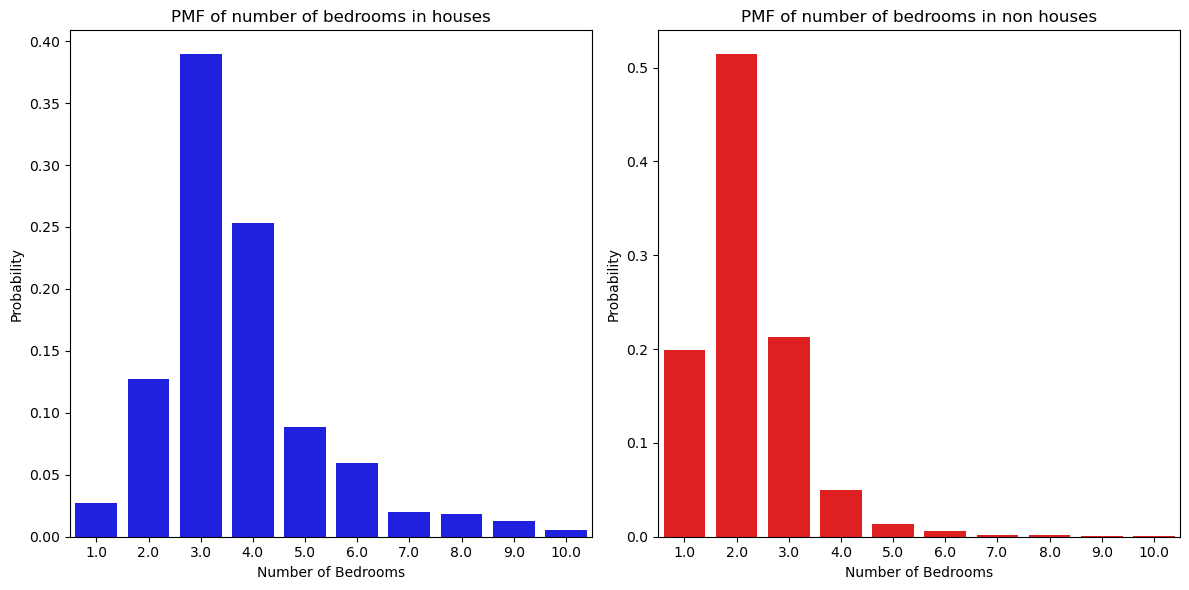

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=house_bed_pmf.index, y=house_bed_pmf.values, ax=ax1, color='blue')
ax1.set_title('PMF of number of bedrooms in houses')
ax1.set_xlabel('Number of Bedrooms')
ax1.set_ylabel('Probability')

sns.barplot(x=non_bed_pmf.index, y=non_bed_pmf.values, ax=ax2, color='red')
ax2.set_title('PMF of number of bedrooms in non houses')
ax2.set_xlabel('Number of Bedrooms')
ax2.set_ylabel('Probability')

plt.tight_layout()
plt.show()

### CDF

In [40]:
size_sort = sorted(size)

In [41]:
n = len(size_sort)
size_cdf = [i / n for i in range(1, n+1)]

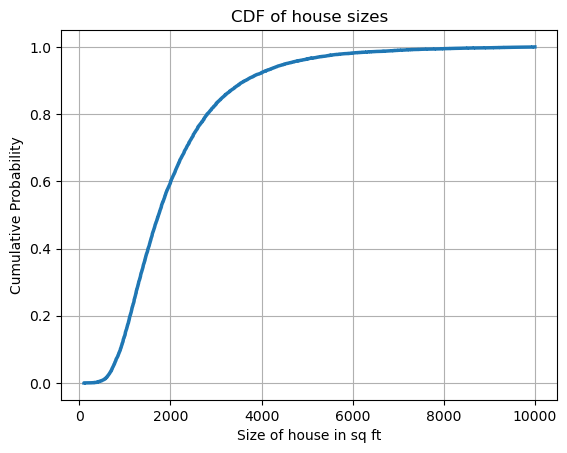

In [42]:
plt.plot(size_sort, size_cdf, linewidth= 2.5)
plt.xlabel('Size of house in sq ft')
plt.ylabel('Cumulative Probability')
plt.title('CDF of house sizes')
plt.grid(True)
plt.show()

### Scatter Plots

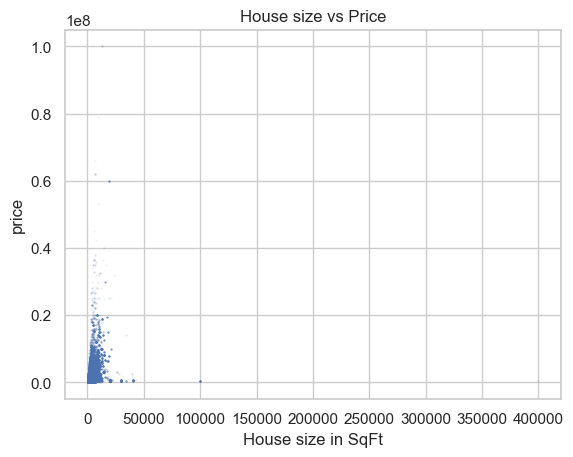

In [57]:
plt.scatter(data=realtor_df, x= 'house_size', y='price', alpha=.1, s= .2)

plt.xlabel('House size in SqFt')
plt.ylabel('price')
plt.title('House size vs Price')

plt.show()

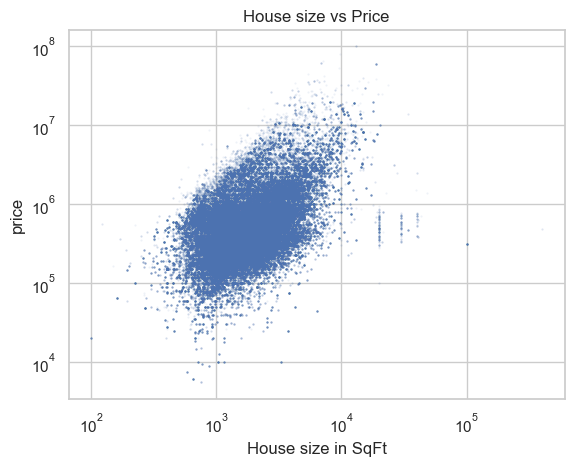

In [55]:
plt.scatter(data=realtor_df, x= 'house_size', y='price', alpha=.1, s= .2)

plt.xlabel('House size in SqFt')
plt.ylabel('price')
plt.title('House size vs Price')

plt.xscale('log')
plt.yscale('log')

plt.show()

In [87]:
np.corrcoef(realtor_df.house_size, realtor_df.price)

array([[1.     , 0.33639],
       [0.33639, 1.     ]])

In [79]:
from scipy.stats import spearmanr

In [88]:
spearmanr(realtor_df.house_size, realtor_df.price)

SignificanceResult(statistic=0.47852053583893306, pvalue=0.0)

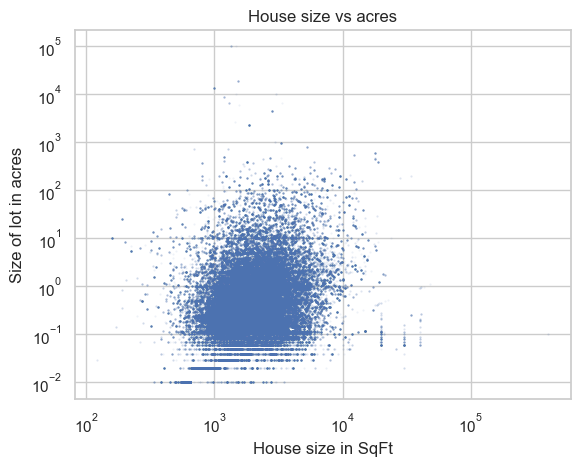

In [92]:
plt.scatter(data=house, x= 'house_size', y='acre_lot', alpha=.1, s= .2)

plt.xlabel('House size in SqFt')
plt.ylabel('Size of lot in acres')
plt.title('House size vs acres')

plt.xscale('log')
plt.yscale('log')

plt.show()

In [94]:
realtor_sub = realtor_df[(realtor_df['house_size'].notnull()) & (realtor_df['acre_lot'].notnull())]

In [96]:
np.corrcoef(realtor_sub.house_size, realtor_sub.acre_lot)

array([[ 1.00000000e+00, -2.13775345e-04],
       [-2.13775345e-04,  1.00000000e+00]])

In [97]:
spearmanr(realtor_sub.house_size, realtor_sub.acre_lot)

SignificanceResult(statistic=0.22934523649650557, pvalue=0.0)

### Analytical model

In [98]:
from scipy.stats import pareto
from scipy.optimize import minimize

In [115]:
price_par = np.array(price[price > 0].dropna())

In [116]:
x_min = np.min(price_par)
alpha = np.mean(np.log(price_par))

In [117]:
def neg_log_likelihood(params):
    alpha, x_min = params
    return -np.sum(pareto.logpdf(price_par, alpha, loc=0, scale=x_min))

In [119]:
initial_guess = [1, np.min(price_par)]
result = minimize(neg_log_likelihood, initial_guess, method='Nelder-Mead')
alpha_mle, x_min_mle = result.x

In [120]:
print(alpha_mle, x_min_mle)

0.07612801431553581 0.9999999974616436


In [126]:
x_range = np.linspace(np.min(price_par), np.max(price_par), 1000)

In [127]:
pdf_values = pareto.pdf(x_range, alpha_mle, loc=0, scale=x_min_mle)

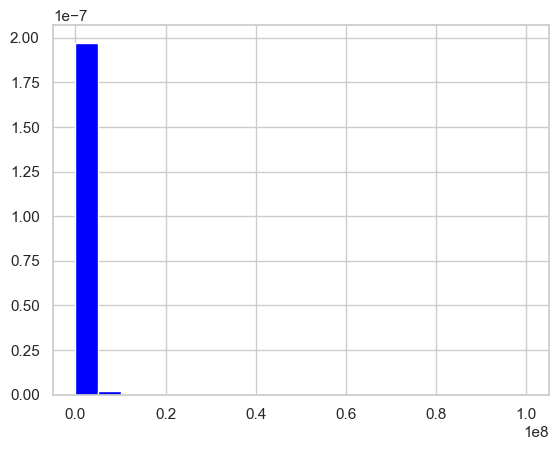

In [132]:
plt.hist(price_par, bins=20, density=True, label='Data Histogram', color='blue')

plt.show()

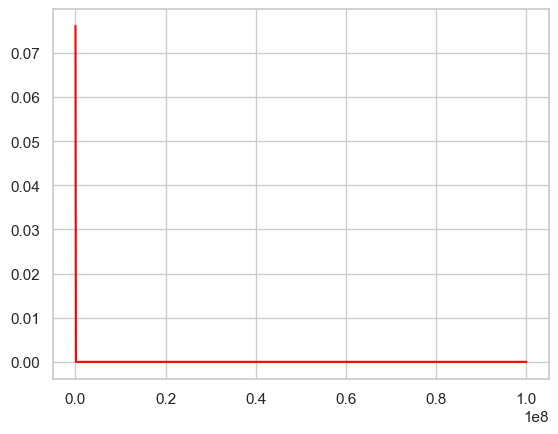

In [133]:
plt.plot(x_range, pdf_values, color='red', label='Fitted Pareto')

plt.show()

### regression analysis

In [136]:
import statsmodels.formula.api as smf

In [137]:
formula = 'price ~ house_size + acre_lot + bed + bath'
model = smf.ols(formula, data=realtor_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                 3.138e+04
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:56:36   Log-Likelihood:            -4.2005e+06
No. Observations:              274922   AIC:                         8.401e+06
Df Residuals:                  274917   BIC:                         8.401e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.107e+05   5382.704    -57.714      0.000   -3.21e+05      -3e+05
house_size    95.5830      1.197     79.868      0.000      93.237      97.929
acre_lot      11.9987      3.739      3.209      0.001       4.670      19.328
bed        -1.055e+05   1619.961    -65.130      0.000   -1.09e+05   -1.02e+05
bath        4.628e+05   1920.465    240.971      0.000    4.59e+05    4.67e+05
==============================================================================
Omnibus:                   645849.952   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      24833980240.542
Skew:                          22.971   Prob(JB):                         0.00
Kurtosis:                    1474.677   Cond. No.                     8.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Hypothesis Test